# Python 画图

本章将展示如何用 Python 的 matplotlib 工具包生成各种各样的图形，并简单介绍另外一个画图工具包 seaborn 如何生成更加美观与复杂的图形。

## 初识 matplotlib 与 ``plot``

使用 matplotlib 包画图时，我们一般加载里面的 pyplot 函数，并命名为 plt，然后使用``plot``函数画图。

In [1]:
# 导入 matplotlib 中的 plot， 并命名为常用名 plt
import matplotlib.pyplot as plt

例如，下面的代码画出正弦函数 $y=sin(x)$ 的图形。

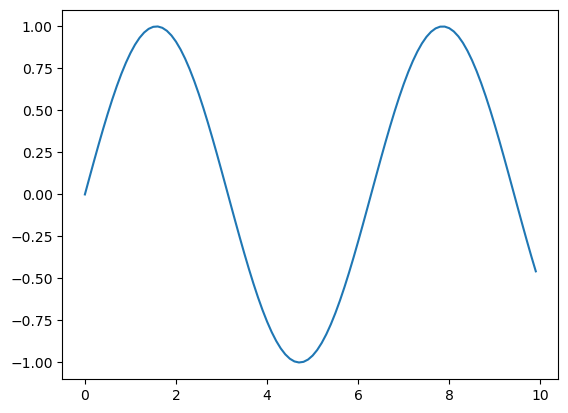

In [2]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.arange(0, 10, 0.1) # 横坐标数据为从0到10之间，步长为0.1的等差数组
y = np.sin(x) # 纵坐标数据为 x 对应的 sin(x) 值

# 将横坐标数据，纵坐标数据放入 plot 函数中，生成图形
plt.plot(x, y)

# 显示图形
plt.show()

``plot`` 函数的基本用法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">plot([x], y, [fmt], **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">[x]</td>
        <td style="text-align:left">可选参数，横坐标数据</td>
    </tr>
    <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">纵坐标数据</td>
    </tr>
    <tr>
        <td style="text-align:left">[fmt]</td>
        <td style="text-align:left">可选参数，定义图形的基本样式：颜色，点形，线形</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">可选参数，定义图形的线条粗细，标签等</td>
    </tr>
</table>
<br />

[fmt] 的常用代码（包括颜色代码、点形代码、线形代码），由下标所示。

| 颜色代码 | 效果 | 线形代码 | 效果 | 点形代码 | 效果   |
|------|----|------|----|------|------|
| b    | 蓝色 | -    | 实线 | o    | 实心圆形 |
| r    | 红色 | --   | 虚线 | .    | 点形   |
| g    | 绿色 | -.   | 折线 | +    | 十字形  |
| k    | 黑色 | :    | 点线 | *    | 星号   |
| w    | 白色 | +    | 加号 |
| y    | 黄色 | x    | 叉号 |

下面一些 plot 函数的代码展示了 [x]，[fmt]，**Kwargs 的一些可选用法。

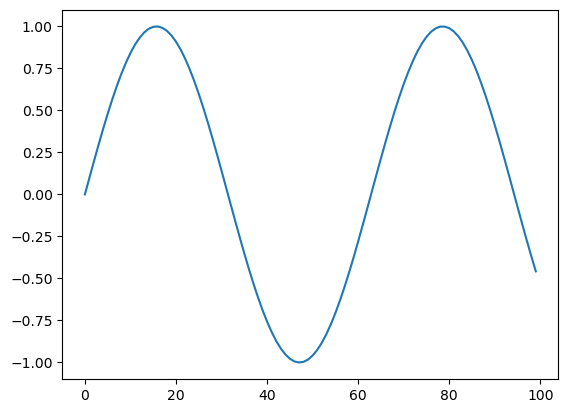

In [3]:
plt.plot(y)           # 据纵坐标数据 y 画图，横坐标数据默认为从 0 到 N-1，步长为 1 的等差数组

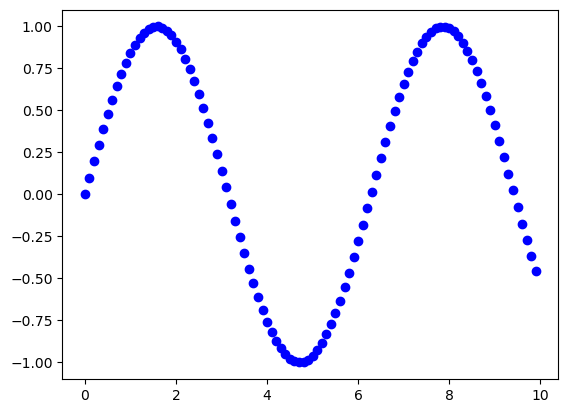

In [4]:
plt.plot(x, y, 'bo')  # 颜色为蓝色('b')、点形为圆('o')

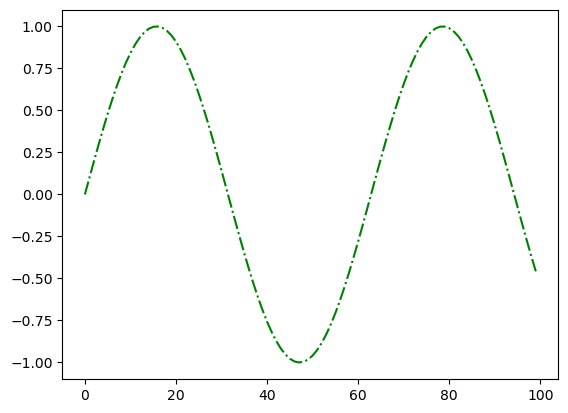

In [5]:
plt.plot(y, 'g-.')     # 颜色为绿色('g')，线形为折线('-.')

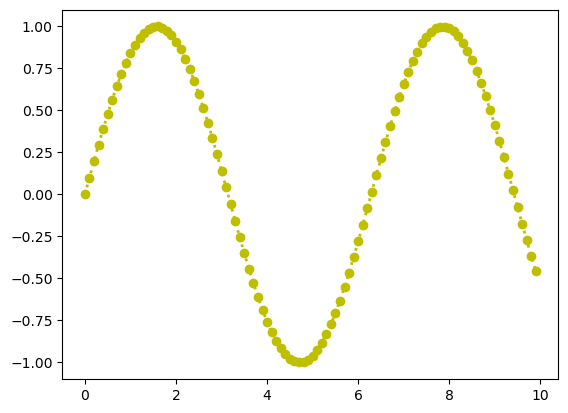

In [6]:
plt.plot(x, y, 'yo:', label='y=sin(x)', lw=2) # 颜色为黄色('y')，点形为圆形('o')，线形为虚线(':')，lable 内容为 'y=sin(x)', 线条宽度为 2

如果我们想自定义坐标轴的标题，坐标轴的刻度，坐标轴刻度的范围，设置图形标题，添加图例时，可以通过设置 pyplot 函数中的 xlable（横坐标轴标题）, ylabel（纵坐标轴标题）, xticks（横坐标轴刻度），yticks（纵坐标轴刻度），title（图形标题）, grid（显示网格），legend（显示图例）等属性来实现。若调整图像的清晰度，可以用``plt.rcParams["figure.dpi"]`` 来调整图像的 dpi 值来实现，调整图像的大小可以通过 ``plt.rcParams('figsize')``来设置图像的长宽。

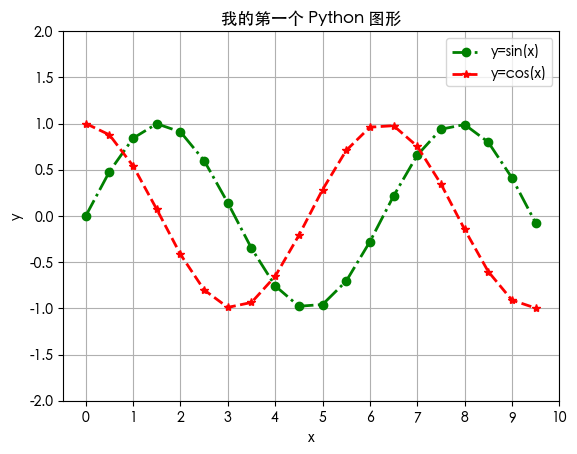

In [7]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

# 生成数据
x = np.arange(0, 10, 0.5)
y1 = np.sin(x)
y2 = np.cos(x)

# figure size or dpi settings
# plt.rcParams('figsize') = [4, 3] # 调整图像大小
plt.rcParams["figure.dpi"] = 100 # 调整图像清晰度，默认为100

# 生成图形
plt.plot(x, y1, 'go-.', label='y=sin(x)', linewidth=2) # 颜色绿色，点形圆形，线性虚线，设置图例显示内容，线条宽度为2
plt.plot(x, y2, 'r*--', label='y=cos(x)', linewidth=2) # 颜色绿色，点形圆形，线性虚线，设置图例显示内容，线条宽度为2

plt.ylabel('y') # 横坐标轴的标题
plt.xlabel('x') # 纵坐标轴的标题
plt.xticks(np.arange(0, 11, 1)) # 设置横坐标轴的刻度为 0 到 10 的数组
plt.ylim([-2, 2]) # 设置纵坐标轴范围为 -2 到 2
plt.legend() # 显示图例, 图例中内容由 label 定义
plt.grid() # 显示网格
plt.title('我的第一个 Python 图形') # 图形的标题

# 显示图形
plt.show()

## 散点图，条形图，直方图

做散点图要用到 pyplot 中的``scatter``函数，该函数的基本语法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">scatter(x, y, s=None, c=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">横坐标数据</td>
    </tr>
    <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">纵坐标数据</td>
    </tr>
    <tr>
        <td style="text-align:left">[s]</td>
        <td style="text-align:left">可选参数，一个数或一个数组，设置每个散点的大小</td>
    </tr>
    <tr>
        <td style="text-align:left">[c]</td>
        <td style="text-align:left">可选参数，一个数或一个数组，设置每个散点的颜色</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">可选参数，定义其他属性，例如图形透明度 alpha</td>
    </tr>
</table>
<br />

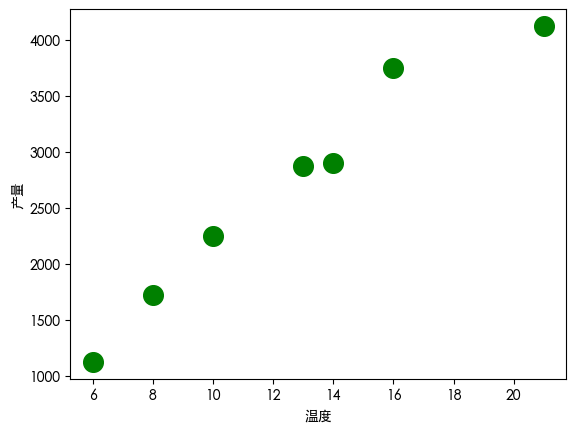

In [8]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

# 输入产量与温度数据
production = [1125, 1725, 2250, 2875, 2900, 3750, 4125]
temp = [6, 8, 10, 13, 14, 16, 21]

plt.scatter(temp, production, s=200, c='g')  # 画散点图，大小为 200
plt.xlabel('温度')  # 横坐标轴标题
plt.ylabel('产量')  # 纵坐标轴标题
plt.show()

条形图（bar chart），也称为柱状图，要用到 pyplot 中的``bar``函数生成，该函数的基本语法为：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">bar(x, height, width=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">横坐标数据</td>
    </tr>
    <tr>
        <td style="text-align:left">height</td>
        <td style="text-align:left">一个数或一个数组，条形的高度</td>
    </tr>
    <tr>
        <td style="text-align:left">width</td>
        <td style="text-align:left">可选参数，一个数或一个数组，条形的宽度</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">可选参数，定义其他属性，例如颜色，透明度等</td>
    </tr>
</table>
<br />

假设某项针对男女大学生购买饮用水爱好的调查结果如下表：

| 选择 | 男  | 女  |
|:--:|----|----|
| 碳酸饮料 | 6  | 9  |
| 绿茶   | 7  | 4  |
| 矿泉水  | 6  | 4  |
| 果汁   | 1  | 5  |
| 其他   | 2  | 6  |
| 总计   | 22 | 28 |

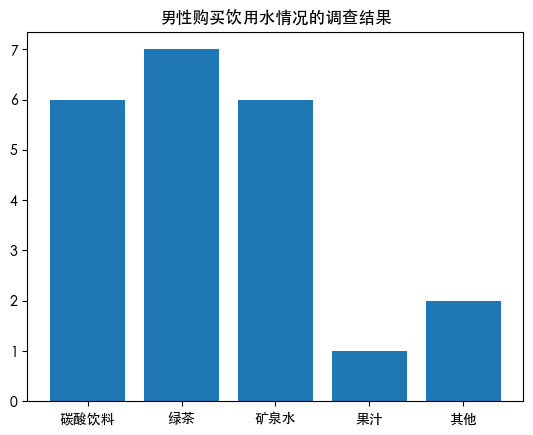

In [9]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

waters = ('碳酸饮料', '绿茶', '矿泉水', '果汁', '其他')
buy_number = [6, 7, 6, 1, 2]

plt.bar(waters, buy_number)
plt.title('男性购买饮用水情况的调查结果')

plt.show()

横放条形图使用``barh``函数，用法与``bar``基本一致。

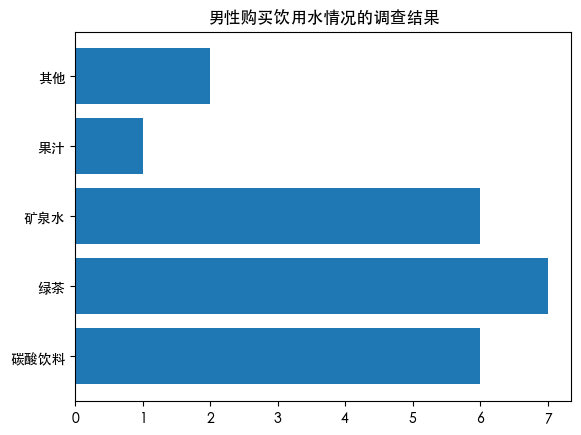

In [10]:
waters = ('碳酸饮料', '绿茶', '矿泉水', '果汁', '其他')
buy_number = [6, 7, 6, 1, 2]

plt.barh(waters, buy_number)
plt.title('男性购买饮用水情况的调查结果')

plt.show()

若要将男生与女生的调查情况画出两个条形图一块显示，则可以使用``bar``或``barh``函数两次，并调整``bar``或``barh``函数的条形图位置坐标以及相应刻度，使得两组条形图能够并排显示。

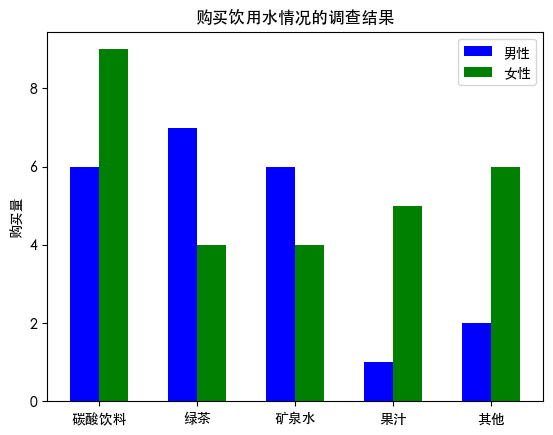

In [11]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

# 输入统计数据
waters = ('碳酸饮料', '绿茶', '矿泉水', '果汁', '其他')
buy_number_male = [6, 7, 6, 1, 2]
buy_number_female = [9, 4, 4, 5, 6]

bar_width = 0.3  # 条形宽度
index_male = np.arange(len(waters))  # 男生条形图的横坐标
index_female = index_male + bar_width  # 女生条形图的横坐标

# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=buy_number_male, width=bar_width, color='b', label='男性')
plt.bar(index_female, height=buy_number_female, width=bar_width, color='g', label='女性')

plt.legend()  # 显示图例
plt.xticks(index_male + bar_width/2, waters)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('购买量')  # 纵坐标轴标题
plt.title('购买饮用水情况的调查结果')  # 图形标题

plt.show()

直方图（histogram）虽然在样式上类似条形图，但它们的作用不一样。直方图用不同的矩形表示频数，常用来观察一组数据的概率分布。在直角坐标中，用横轴表示数据分组，纵轴表示频数或频率，各组与相应的频数就形成了一个个矩形，即直方图。画直方图用到 pyplot 中的``hist``函数，它的基本语法为：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">hist(x, bins=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">输入数据</td>
    </tr>
    <tr>
        <td style="text-align:left">bins</td>
        <td style="text-align:left"> 可选参数，条柱个数，若不指定则自动计算一个数</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">可选参数，定义其他属性，例如颜色，透明度等</td>
    </tr>
</table>
<br />

下面的代码根据一组数据生成直方图：

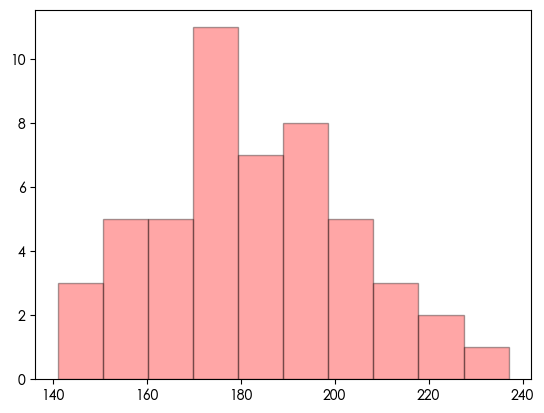

In [12]:
import matplotlib.pyplot as plt

x = [141, 159, 166, 172, 177, 182, 188, 196, 203, 214,
     143, 160, 167, 173, 177, 183, 189, 196, 203, 215,
     144, 160, 168, 173, 178, 184, 189, 196, 205, 218,
     152, 162, 170, 174, 179, 186, 190, 197, 208, 226,
     158, 165, 172, 176, 182, 188, 195, 202, 213, 237]

plt.hist(x, color='r', edgecolor='k', alpha=0.35) # 设置直方图填充颜色为红，边线颜色为黑色，不透明度为 0.35
plt.show()

## 饼图，箱线图

饼图（pie char）是一个划分为几个扇形的圆形统计图表，一般用于描述频率或百分比之间的相对关系。在饼图中，每个扇区的弧长（以及圆心角和面积）的大小与其所表示的数量呈固定比例。画饼图使用 pyplot 中的``pie``函数，它的基本语法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">pie(x, expode=None, labels=None, autopic=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">数组，每个扇区的比例</td>
    </tr>
    <tr>
        <td style="text-align:left">expode</td>
        <td style="text-align:left"> 可选参数，数组，每个扇区突出的大小</td>
    </tr>
    <tr>
        <td style="text-align:left">labels</td>
        <td style="text-align:left"> 可选参数，字符串数组，每个扇区的标签</td>
    </tr>
    <tr>
        <td style="text-align:left">autopct</td>
        <td style="text-align:left">可选参数，字符串或函数，每个扇区显示的数字样式</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">可选参数，定义其他属性，例如扇区阴影 shadow，起始角度 startangle 等</td>
    </tr>
</table>
<br />

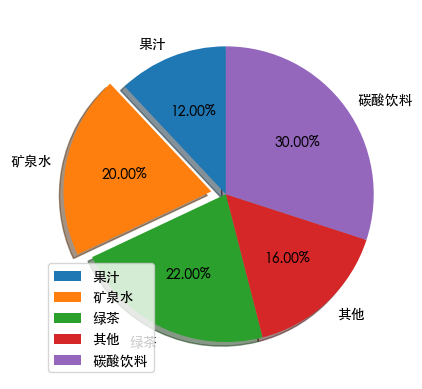

In [13]:
# 导入工具包
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

labels = ['果汁', '矿泉水', '绿茶', '其他', '碳酸饮料']
x = [6, 10, 11, 8, 15]
explode = [0, 0.1, 0, 0, 0]  # 突出显示第二个扇区

plt.pie(x, explode=explode, labels=labels, autopct='%.2f%%', shadow=True, startangle=90)
plt.legend()  # 显示标签
plt.show()

箱线图（box plot）是一种用来显示数据统计分布情况的图形，包括数据的最大值、最小值、中位数、分位数等特征。画箱线图使用 pyplot 中的``boxplot``函数，它的基本语法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">boxplot(x, notch=false, vert=false,  **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">输入数据</td>
    </tr>
    <tr>
        <td style="text-align:left">notch</td>
        <td style="text-align:left"> 可选参数，是否为锯齿状的箱线图</td>
    </tr>
    <tr>
        <td style="text-align:left">vert</td>
        <td style="text-align:left"> 箱线图是否为竖直,否则为水平</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">可选参数，定义其他属性</td>
    </tr>
</table>
<br />

假设有下面的学生成绩单：
|课程|学生A|学生B|学生C|学生D|学生E|学生F|学生G|学生H|学生I|学生J|学生K|
|:-----:|----|----|----|----|----|----|----|----|----|----|----|
| 英语    | 76 | 90 | 97 | 71 | 70 | 93 | 86 | 83 | 78 | 85 | 81 |
| 西方经济学 | 93 | 81 | 76 | 88 | 66 | 79 | 83 | 92 | 78 | 86 | 78 |
| 市场营销学 | 74 | 87 | 85 | 69 | 90 | 80 | 77 | 84 | 91 | 74 | 70 |
| 财务管理  | 68 | 75 | 70 | 84 | 73 | 60 | 76 | 81 | 88 | 68 | 75 |
| 统计学   | 55 | 91 | 68 | 73 | 84 | 81 | 70 | 69 | 94 | 62 | 71 |

画出它们的箱线图如下：

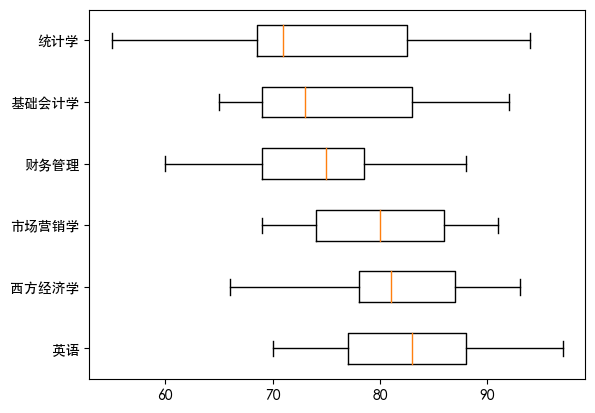

In [14]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

scores = [[76, 90, 97, 71, 70, 93, 86, 83, 78, 85, 81],
         [93, 81, 76, 88, 66, 79, 83, 92, 78, 86, 78],
         [74, 87, 85, 69, 90, 80, 77, 84, 91, 74, 70],
         [68, 75, 70, 84, 73, 60, 76, 81, 88, 68, 75],
         [70, 73, 92, 65, 78, 87, 90, 70, 66, 79, 68],
         [55, 91, 68, 73, 84, 81, 70, 69, 94, 62, 71]]
courses = ('英语', '西方经济学', '市场营销学', '财务管理', '基础会计学', '统计学')

plt.boxplot(scores,vert=False)
plt.yticks(np.arange(1, 7), courses) # 更改横坐标刻度为课程名字
plt.show()

## 子图函数 subplot

若要 pyplot 一次生成多个图形，一般要用到``subplot``函数，它的基本语法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">ax = plt.subplot(nrows=1, ncols=1, index=1, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">nrows</td>
        <td style="text-align:left">子图的行数</td>
    </tr>
    <tr>
        <td style="text-align:left">ncols</td>
        <td style="text-align:left">子图的列数</td>
    </tr>
     <tr>
        <td style="text-align:left">index</td>
        <td style="text-align:left">子图的位置索引，从坐上到右下查起，起始值为1</td>
    </tr>
    <tr>
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">其他参数</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ax</td>
        <td style="text-align:left">用于调整子图的参数</td>
    </tr>
</table>
<br />

下面举例说明如何生成3个子图，并且其中一个子图横跨2列。

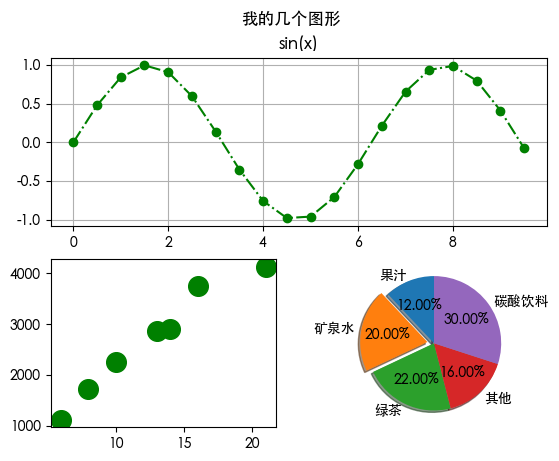

In [15]:
# 导入工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager # 调用 matplotlib 中的字体，用于显示中文

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 黑体， 宋体：'Songti SC'
plt.rcParams['axes.unicode_minus'] = False

# 第一个图形
x = np.arange(0, 10, 0.5)
y = np.sin(x)
ax1 = plt.subplot(2,1,1) # 将画布分为2行1列，该子图位于第1个位置
ax1.plot(x, y, 'go-.')
ax1.grid()
ax1.set_title('sin(x)') # 设置子图标题

# 第二个图形
production = [1125, 1725, 2250, 2875, 2900, 3750, 4125]
temp = [6, 8, 10, 13, 14, 16, 21]
ax2 = plt.subplot(2, 2, 3) # 将画布分为2行1列，该子图位于第3个位置
ax2.scatter(temp, production, s=200, c='g')  # 散点图

# 第三个图形
labels = ['果汁', '矿泉水', '绿茶', '其他', '碳酸饮料']
num = [6, 10, 11, 8, 15]
explode = [0, 0.1, 0, 0, 0] 
ax3 = plt.subplot(2, 2, 4) # 将画布分为2行2列，该子图位于第4个位置
ax3.pie(num, explode=explode, labels=labels, autopct='%.2f%%', shadow=True, startangle=90) # 饼图

plt.suptitle('我的几个图形') # 设置整体图形的标题
plt.show()

另外还有一个``subplots``函数，使用方法是``fig, axs = plt.subplots(nrows=1, ncols=1, index=1, **kwargs)``。其中，fig 用于调整整体图形的参数，而 axs 用于调整每个子图的参数。限于篇幅，我们不做过多介绍。

## seaborn 简介

seanborn 是 Python 的另外一个常用工具包，它基于 matplotlib，但画出的图形更加美观些，并且与 Pandas 的数据类型结合地较好。

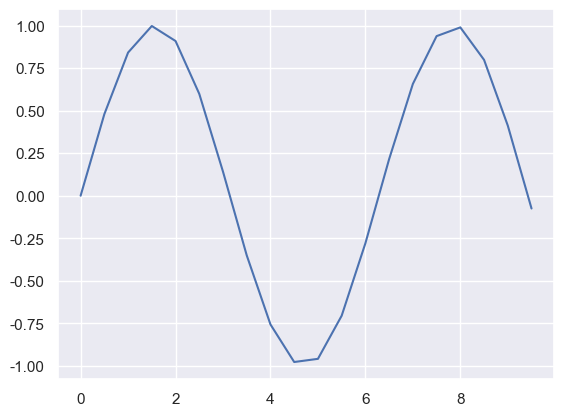

In [16]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme() # 应用 seaborn 的默认主题

x = np.arange(0, 10,0.5)
y = np.sin(x)
plt.plot(x, y)
plt.show()

可以看出，应用 seaborn 的主题后，图形的配色变化了些。下面我们导入 seaborn 自带的数据集 tips。

In [17]:
# Load an example dataset
tips = sns.load_dataset("tips") # seaborn 自带的数据集，国内导入网速慢可能出错，可以把数据集提前从 github 上下载到电脑里
print(tips)
type(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


pandas.core.frame.DataFrame

可以看出，tips 数据集载入后，是 Pandas 的 DataFrame 类型，seaborn 可以方便地针对 DataFrame 数据集画图。下面，我们以其中的``relplot`` 函数为例，讲解如何使用 seanborn 画图。``relplot`` 函数的基本用法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">relplot(data=None, x=None, y=None, row=None, col=None，hue=None, kind='scatter', **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">data</td>
        <td style="text-align:left">输入的数据，常见的数据类型，例如 Pandas 或 Numpy 中的数据</td>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">横坐标数据</td>
    </tr>
     <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">纵坐标数据</td>
    </tr>
     <tr>
        <td style="text-align:left">row/col</td>
        <td style="text-align:left">将数据按行或列划分为子数据集，生成多个子图</td>
    </tr>
    <tr>
        <td style="text-align:left">hue</td>
        <td style="text-align:left">颜色，可以是数值类型或类别数据</td>
    </tr>
     <tr>
        <td style="text-align:left">kind</td>
        <td style="text-align:left">图像类型，'line' 或 ‘scatter'</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">其他参数，例如 style，sizes 等</td>
    </tr>
</table>
<br />


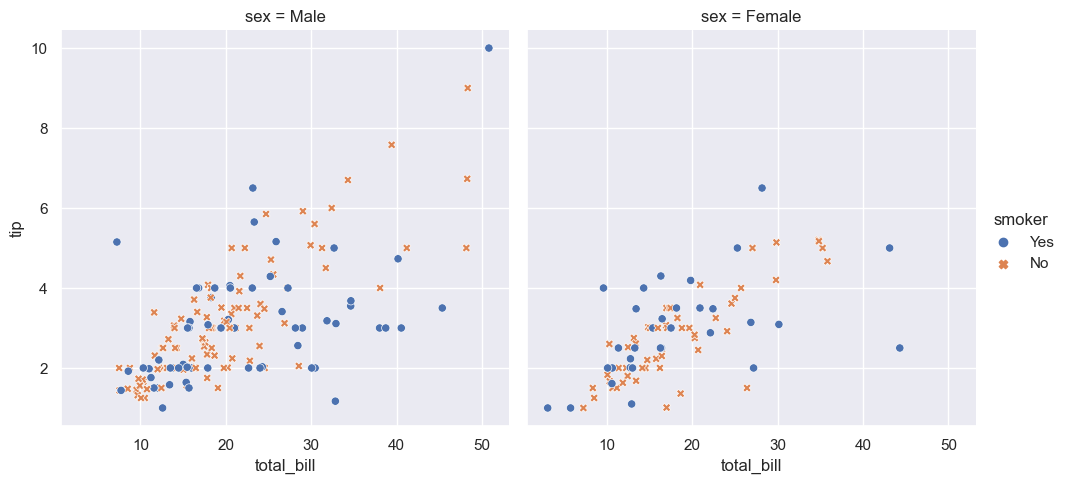

In [18]:
sns.relplot(
    data = tips, 
    x = "total_bill", y="tip", 
    hue = 'smoker', # 按是否吸烟生成不同的颜色
    col = 'sex', # 按不同性别生成子图
    style = 'smoker' # 按是否吸烟生成不同的点形
)
plt.show()

生成线图时，相同横坐标的数据将会合并，并且，图像会显示均值以及 95% 的置信区间：

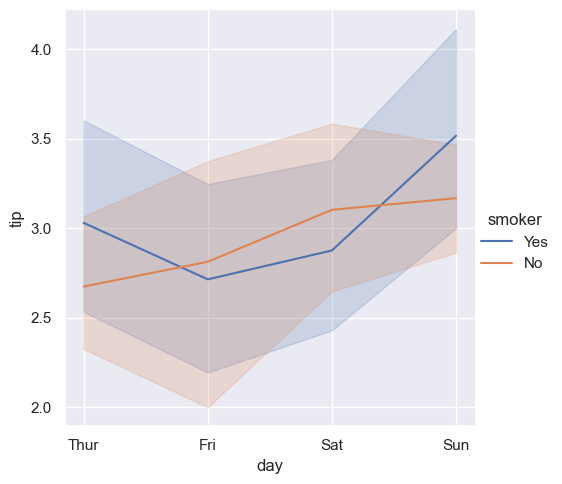

In [19]:
sns.relplot(
    data = tips, 
    x = "day", y="tip", 
    hue = 'smoker', # 按是否吸烟生成不同的颜色
    kind = 'line'
)
plt.show()

seaborn 自带一些函数生成常见的图形，例如``barplot``生成条形图，``histplot``生成直方图，``boxplot``生成箱线图：

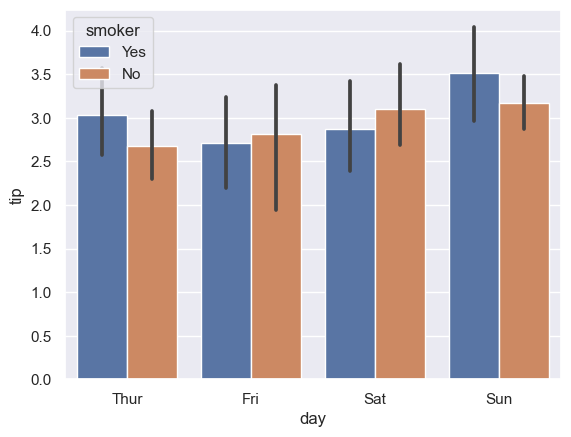

In [20]:
sns.barplot(
    data = tips, 
    x = "day", y="tip", 
    hue = 'smoker', # 按是否吸烟生成不同的颜色
)
plt.show()

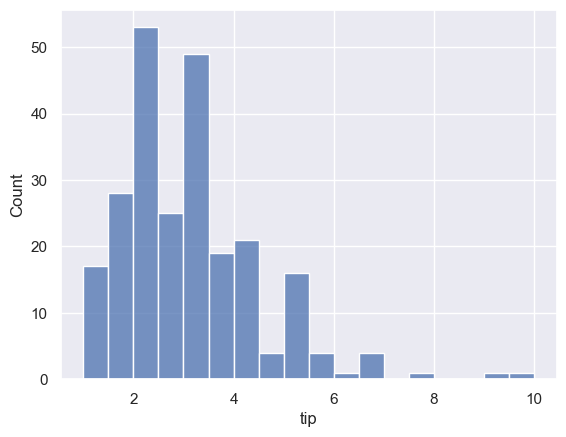

In [21]:
sns.histplot(
    data = tips, 
    x = "tip", 
)
plt.show()

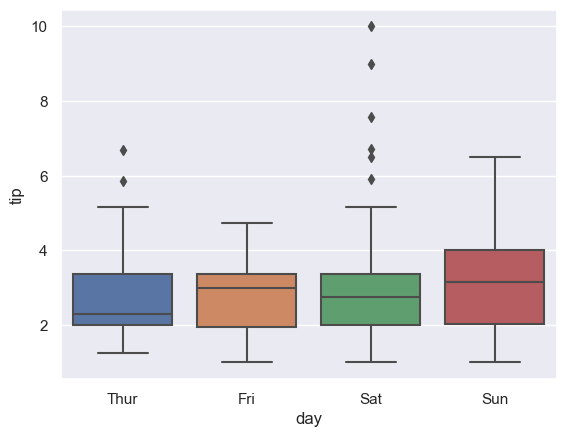

In [22]:
sns.boxplot(
    data = tips, 
    x = "day",
    y = "tip", 
)
plt.show()

seaborn 还有其他一些画图函数，例如``heatmap``生成热力图，``violinplot``生成小提琴图，限于篇幅，本文不再赘述，有兴趣的读者可以查阅官方文档。